In [1]:
import tributary.lazy as tl
from greeks import Env, Point
from datetime import datetime, timedelta

In [2]:
e = Env()

In [3]:
e.now().eval()

datetime.datetime(2021, 3, 3, 0, 37, 46, 416257)

In [4]:
# e.now().setValue(datetime.now())

In [5]:
# e.now().unlock()

In [6]:
# e.now().graphviz()

In [7]:
pt = Point(e)

In [8]:
# pt._value._callable_kwargs["now"]

In [9]:
pt.value()

nan

In [10]:
# pt.setValue(50)

In [11]:
# pt._value.graphviz()

In [12]:
# pt.plot()

In [13]:
class RFR(Point):
    def __init__(self, value=0, *args, **kwargs):
        super().__init__(name="RFR")
        self.setValue(value)

# class Forward(Point):
#     def __init__(self, underlying: Point, rfr: Point, *args, **kwargs):
#         super().__init__(name="Forward", *args, **kwargs)
    

In [14]:
'''
Consider a forward contract that has a term of 2 years.
The price of the asset underlying the contract is currently
$200 and the risk-free rate is 9%. Given the forward price
of $220, the value of the forward contract at initiation is
closest to:

A. $14.83

B. -$1.83

C. $31.66

Solution

The correct answer is A.

In this scenario, the value of the forward contract at initiation
is the difference between the price of the underlying asset today
and the forward price discounted at the risk-free rate:

200 – [220 / (1 + 0.09)^2] = $14.83

Note that the forward price at contract initiation is the unique
price that would induce traders to participate in arbitrage until
the price of the forward contract equals the non-arbitrage forward
price.''';

In [31]:
rfr = RFR()
asset = Point()

In [32]:
# fix point in time
e.now().setValue(datetime(2021, 3, 3))

# set value of asset and rfr
term = 2 # 2 years
rfr.setValue(0.09) # 9%
asset.setValue(200) # $200 underlying asset price at start
start = tl.Node(value=e.now().eval())  # start now

In [33]:
CONTINUOUS = -1
SECOND = 1
MINUTE = 60
HOUR = MINUTE * 60
DAILY = HOUR * 24
WEEKLY = DAILY * 7
MONTHLY = DAILY * 30
YEARLY = DAILY * 365

In [34]:
def price(now, asset, rfr, start):
    return asset / (1.0 + rfr) ** ((now - start).total_seconds() / YEARLY)

def price1(now, asset, rfr, start):
    return asset.value() / (1.0 + rfr.value()) ** ((now.value() - start.value()).total_seconds() / YEARLY)

def price2(now, asset, rfr, start):
    return asset / (1.0 + rfr) ** ((now - start)().total_seconds() / YEARLY)


In [35]:
# price(datetime.now(), 200, 0.09, datetime(2020, 3, 3, 0))

In [36]:
n = tl.Node(callable=price1, callable_kwargs={"now": e.now(), "asset": asset.node(), "rfr": rfr.node(), "start": start})

In [37]:
n()

200.0

In [38]:
# e.now().setValue(datetime(2021, 3, 3))

In [39]:
start.setValue(datetime(2020, 3, 3))

In [40]:
n()

183.48623853211006

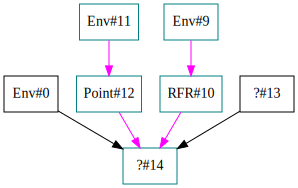

In [41]:
n.graphviz()

In [42]:
start.setValue(datetime(2019, 3, 3))

In [43]:
n()

168.29625866388562

In [44]:
start.setValue(datetime(2021, 2, 3))

In [45]:
n()

198.68218242088042

In [46]:
start.setValue(datetime(2021, 3, 3))

In [47]:
n()

200.0

In [48]:
rfr.setValue(0.05) # set rfr to 5%

In [49]:
start.setValue(datetime(2019, 3, 3)) # try 2019/03/03 again

In [50]:
n() # 181 < 168 because 0.05% < 0.09% time-value of money

181.38164848090798